In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import us # for converting state names to numeric geolocation
import plotly.graph_objects as go # to plot heatmaps
import gmaps # to plot heatmaps using Google Maps

# libraries for folium heatmaps
import folium
from folium import plugins

In [2]:
df = pd.read_csv("./data/scrubbed.csv")
print(f"Num entries (all countries, including null): {df.count()['datetime']}")

df = df[df['country'] == 'us']
df['state'] = df['state'].str.upper()
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['doy'] = df['datetime'].dt.day_of_year
df['dow'] = df['datetime'].dt.day_of_week


print(f"Num US entries: {df.count()['country']}")

# EXCLUDE LEAP YEARS WHEN CALCULATING DOY
# 186 entries on 60th day of the year. 25 of these are Feb 29, rest are Mar 01.
# For 25 entries occuring on Feb 29th, they will be added to the Mar01 count for normalization. Introducing small amount of error.
# print(df[(df['doy']==60) & (df['month']==2)].count())

df['doy_normalized'] = np.where((df['year']%4 == 0) & (df['doy']>60), df['doy']-1, df['doy'])

df.head()


/tmp/ipykernel_54504/2900239926.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/scrubbed.csv")


Num entries (all countries, including null): 80332
Num US entries: 65114


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,year,month,day,doy,dow,doy_normalized
0,1949-10-10 20:30:00,san marcos,TX,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10,1949,10,10,283,0,283
3,1956-10-10 21:00:00,edna,TX,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10,1956,10,10,284,2,283
4,1960-10-10 20:00:00,kaneohe,HI,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10,1960,10,10,284,0,283
5,1961-10-10 19:00:00,bristol,TN,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,1961-10-10,1961,10,10,283,1,283
7,1965-10-10 23:45:00,norwalk,CT,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,1965-10-10,1965,10,10,283,6,283


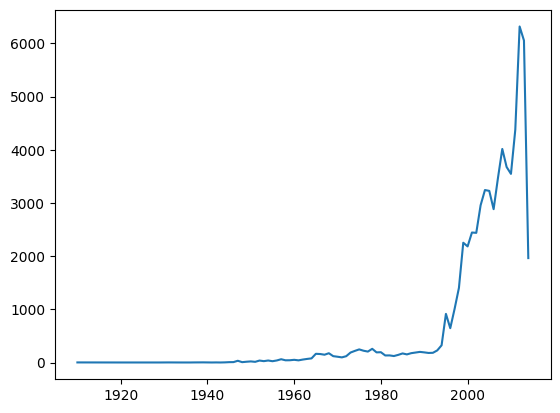

In [3]:
grouped = df.groupby('year').size()
grouped.head()
dates = grouped.index
counts = grouped.reset_index(name='count')['count']
plt.plot(dates, counts)

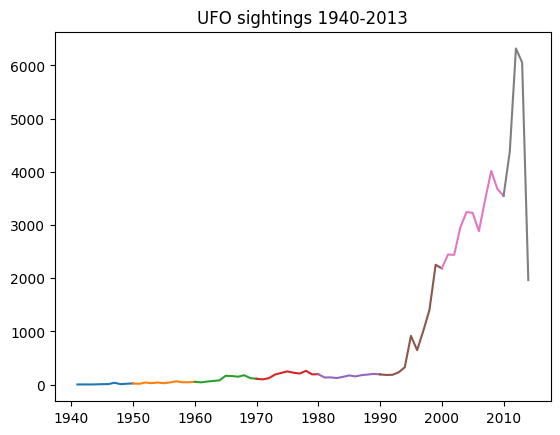

In [65]:
grouped = df.groupby('year').size()
for i in range(1940, 2030, 10):
    grouped_loc = grouped.loc[i:i+10]
    grouped_loc.head()
    dates = grouped_loc.index
    counts = grouped_loc.reset_index(name='count')['count']
    plt.plot(dates, counts)
    plt.title("UFO sightings 1940-2013")

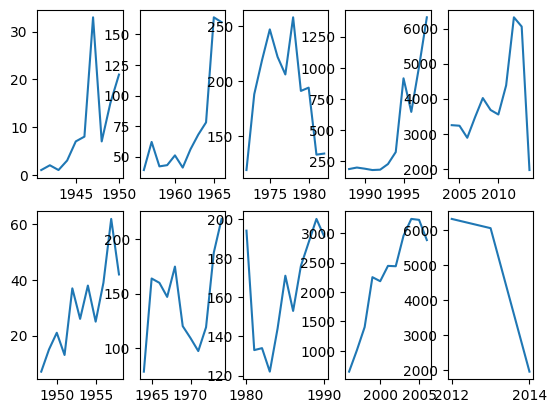

In [5]:
grouped = df.groupby('year').size()
fig, axs = plt.subplots(2,5)
subplx = 0
subply = 0
for i in range(1940, 2020, 8):
    grouped_loc = grouped.loc[i:i+10]
    grouped_loc.head()
    dates = grouped_loc.index
    counts = grouped_loc.reset_index(name='count')['count']
    axs[subplx, subply].plot(dates, counts)
    
    if subplx > 0:
        subplx = 0
        subply += 1
    else:
        subplx += 1

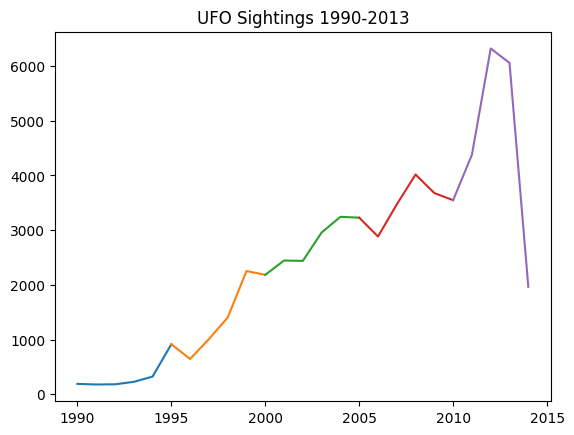

In [66]:
# 1990 to 2015
d1 = 1990
d2 = 2015
inc = 5
grouped = df.groupby('year').size()
for i in range(d1, d2, inc):
    grouped_loc = grouped.loc[i:i+inc]
    grouped_loc.head()
    dates = grouped_loc.index
    counts = grouped_loc.reset_index(name='count')['count']
    plt.plot(dates, counts)
    plt.title("UFO Sightings 1990-2013")

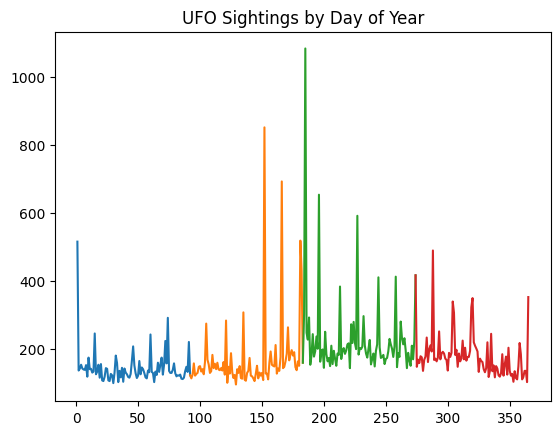

In [69]:

grouped = df.groupby('doy_normalized').size()
for i in range(1, 366, 91):
    grouped_loc = grouped.loc[i:i+91]
    grouped_loc.head()
    dates = grouped_loc.index
    counts = grouped_loc.reset_index(name='count')['count']
    plt.plot(dates, counts)
    plt.title("UFO Sightings by Day of Year")

In [8]:
df.head()
doy_counts = df.groupby('doy_normalized').size()
counts = doy_counts.reset_index(name='count')['count']
sorted_counts = counts.sort_values(ascending=False)
print(f"Top 15 days: \n")
for i in range(15):
    print(f"{sorted_counts.iloc[i]}\t{sorted_counts.index[i]+1}\t{str(date.fromordinal(date(2001, 1, 1).toordinal() + sorted_counts.index[i]))[5:]}")

Top 15 days: 

1083	185	07-04
851	152	06-01
692	166	06-15
653	196	07-15
591	227	08-15
518	181	06-30
515	1	01-01
489	288	10-15
429	182	07-01
416	274	10-01
412	258	09-15
410	244	09-01
383	213	08-01
352	365	12-31
349	320	11-16


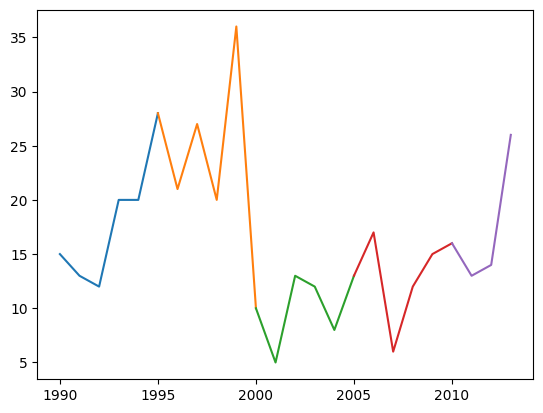

In [9]:
june1 = df[df['doy_normalized']==152]

# 1990 to 2015
d1 = 1990
d2 = 2015
inc = 5
grouped = june1.groupby('year').size()
for i in range(d1, d2, inc):
    grouped_loc = grouped.loc[i:i+inc]
    grouped_loc.head()
    dates = grouped_loc.index
    counts = grouped_loc.reset_index(name='count')['count']
    plt.plot(dates, counts)

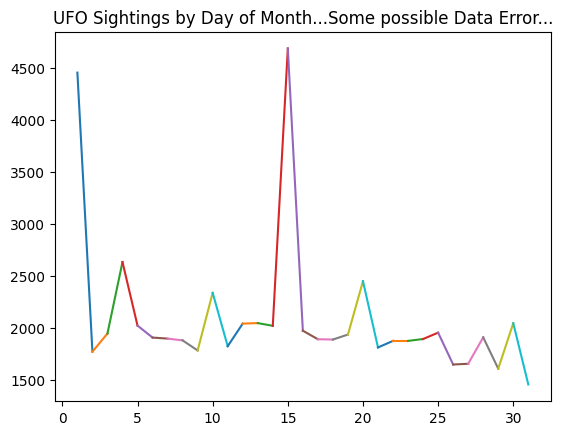

In [67]:


# 1990 to 2015
d1 = 1
d2 = 31
inc = 1
grouped = df.groupby('day').size()
for i in range(d1, d2, inc):
    grouped_loc = grouped.loc[i:i+inc]
    grouped_loc.head()
    dates = grouped_loc.index
    counts = grouped_loc.reset_index(name='count')['count']
    plt.plot(dates, counts)
    plt.title("UFO Sightings by Day of Month...Some possible Data Error...")

Text(0.5, 1.0, 'Sightings by Day of Week')

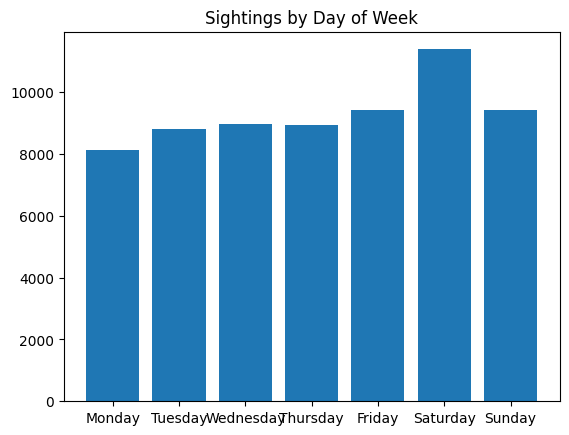

In [68]:
bins = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

grouped = df.groupby('dow').size()
dates = grouped.index
grouped.head()
counts = grouped.reset_index(name='count')['count']
plt.bar(bins, counts)
plt.title("Sightings by Day of Week")

In [12]:
dfs = pd.read_csv("./data/Space_Corrected.csv")
dfs = dfs[dfs['Location'].str.endswith('USA')]
dfs['datetime'] = pd.to_datetime(dfs['Datum'], format='mixed')
dfs['date'] = dfs['datetime'].dt.date
dfs['year'] = dfs['datetime'].dt.year
dfs['month'] = dfs['datetime'].dt.month
dfs['day'] = dfs['datetime'].dt.day
dfs['doy'] = dfs['datetime'].dt.day_of_year
dfs['dow'] = dfs['datetime'].dt.day_of_week


print(f"Num US entries: {dfs.count()['Location']}")

# EXCLUDE LEAP YEARS WHEN CALCULATING DOY
# No feb 29 launches
# print(dfs[(dfs['doy']==60) & (dfs['month']==2)].count())

dfs['doy_normalized'] = np.where((dfs['year']%4 == 0) & (dfs['doy']>60), dfs['doy']-1, dfs['doy'])

dfs.head()

Num US entries: 1344


,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,datetime,date,year,month,day,doy,dow,doy_normalized
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07,2020-08-07,2020,8,7,220,4,219
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04,2020-08-04,2020,8,4,217,1,216
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30,2020-07-30,2020,7,30,212,3,211
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,2020-07-20,2020-07-20,2020,7,20,202,0,201
10,10,10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Wed Jul 15, 2020",Minotaur IV | NROL-129,StatusActive,46.0,Success,2020-07-15,2020-07-15,2020,7,15,197,2,196


<Figure size 640x480 with 0 Axes>

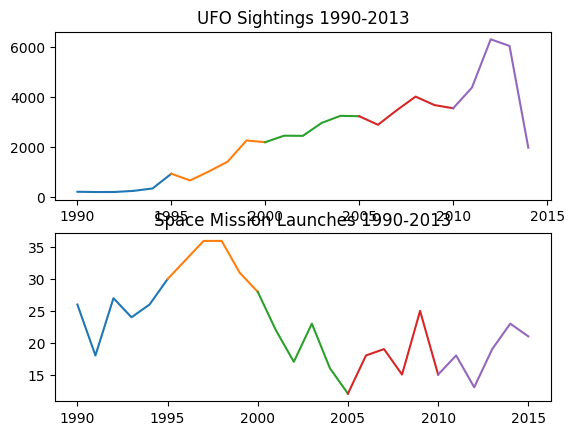

In [62]:
# 1990 to 2015
d1 = 1990
d2 = 2015
inc = 5
fig, axs = plt.subplots(2)
grouped = df.groupby('year').size()
gs = dfs.groupby('year').size()
for i in range(d1, d2, inc):
    grouped_loc = grouped.loc[i:i+inc]
    dates = grouped_loc.index
    counts = grouped_loc.reset_index(name='count')['count']
    axs[0].plot(dates, counts)
    axs[0].set_title("UFO Sightings 1990-2013")

    grouped_loc = gs.loc[i:i+inc]
    dates = grouped_loc.index
    counts = grouped_loc.reset_index(name='count')['count']
    axs[1].plot(dates, counts)
    axs[1].set_title("Space Mission Launches 1990-2013")


In [14]:

df_bystate = df.groupby('state').size()
# df_bystate['state']
states = df_bystate.index
print(states)
counts = df_bystate.reset_index(name='count')['count']

fig = go.Figure(data=go.Choropleth(
    locations=states, # Spatial coordinates
    z = counts.astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = 'Counts',
    text = states
))

fig.update_layout(
    title_text = "UFO Sightings" + ' by state<br>(Hover over the states for details)',
    geo_scope='usa', # limit map scope to USA
)

fig.show()

#plot_heatmap(state_info, 'Population')

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT',
       'WA', 'WI', 'WV', 'WY'],
      dtype='object', name='state')


In [58]:
df_year = df[df['year']==2008]

df_bystate = df_year.groupby('state').size()
# df_bystate['state']
states = df_bystate.index
counts = df_bystate.reset_index(name='count')['count']
print(counts.sum())

fig = go.Figure(data=go.Choropleth(
    locations=states, # Spatial coordinates
    z = counts.astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = 'Counts',
    text = states
))

fig.update_layout(
    title_text = "UFO Sightings" + ' by state<br> In 2008(Hover over the states for details)',
    geo_scope='usa', # limit map scope to USA
)

fig.show()

#plot_heatmap(state_info, 'Population')

4017


In [42]:
df_pop = pd.read_excel('./data/est08us.xls')
df_pop.columns = df_pop.iloc[1]
df_pop = df_pop.iloc[2:]
df_pop["population"] = (df_pop["Poverty Estimate All Ages"] / (0.01 * df_pop['Poverty Percent All Ages']))
df_pop['population'] = np.nan_to_num(pd.to_numeric(df_pop['population']))
df_pop['population'] = df_pop['population'].astype(int)
df_pop = df_pop[['Postal Code', 'population']]
df_pop.columns=["state", 'population']
df_pop.set_index('state')

df_pop.head(50)
states = df_pop['state'].to_list()
pops = df_pop['population'].to_list()
state_dict = {states[i]: pops[i] for i in range(len(pops))}
state_dict.pop(np.nan)
state_dict.pop('US')
print(state_dict)


{'AL': 4540094, 'AK': 672510, 'AZ': 6362224, 'AR': 2769595, 'CA': 35948879, 'CO': 4828973, 'CT': 3389879, 'DE': 854145, 'DC': 563502, 'FL': 17858834, 'GA': 9448700, 'HI': 1253956, 'ID': 1488120, 'IL': 12534713, 'IN': 6198193, 'IA': 2904008, 'KS': 2723929, 'KY': 4144225, 'LA': 4290625, 'ME': 1279126, 'MD': 5473024, 'MA': 6258990, 'MI': 9741222, 'MN': 5101187, 'MS': 2838846, 'MO': 5740274, 'MT': 943056, 'NE': 1726666, 'NV': 2574410, 'NH': 1281269, 'NJ': 8506540, 'NM': 1940335, 'NY': 18947562, 'NC': 8917000, 'ND': 614382, 'OH': 11197849, 'OK': 3530171, 'OR': 3714629, 'PA': 12018512, 'RI': 1009694, 'SC': 4332063, 'SD': 773606, 'TN': 6058425, 'TX': 23771797, 'UT': 2696453, 'VT': 601009, 'VA': 7518156, 'WA': 6435008, 'WV': 1770482, 'WI': 5462609, 'WY': 520684}


In [50]:
df_pop = pd.read_excel('./data/est08us.xls')
df_pop.columns = df_pop.iloc[1]
df_pop = df_pop.iloc[2:]
df_pop["population"] = (df_pop["Poverty Estimate All Ages"] / (0.01 * df_pop['Poverty Percent All Ages']))

fig = go.Figure(data=go.Choropleth(
    locations=df_pop["Postal Code"], # Spatial coordinates
    z = df_pop['Poverty Percent All Ages'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = 'Counts',
    text = df_pop["Postal Code"]
))

fig.update_layout(
    title_text = "Percent Poverty" + ' by state<br>(Hover over the states for details)',
    geo_scope='usa', # limit map scope to USA
)

fig.show()


In [57]:
df_bystate = df.groupby('state').size()
df_bystate = df_bystate.astype('float')
states = df_bystate.index
for key, val in state_dict.items():
    df_bystate.loc[key] = df_bystate.loc[key] / val * (320000)
print(df_bystate.loc['AL'])
counts = df_bystate.reset_index(name='count')['count']
print(counts.sum())

fig = go.Figure(data=go.Choropleth(
    locations=states, # Spatial coordinates
    z = counts.astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = 'Counts',
    text = states
))

fig.update_layout(
    title_text = "UFO Sightings" + ' by state<br>(Hover over the states for details)',
    geo_scope='usa', # limit map scope to USA
)

fig.show()

#plot_heatmap(state_info, 'Population')

45.25016442390841
4105.537146541294
